We want to solve a linear system of equations

$\mathbf{A} \; \mathbf{x} = \mathbf{b} \qquad \left( 1 \right)$,

with $\mathbf{A} \in \mathbb{R}^{m \times n}$, $\mathbf{x}\in \mathbb{R}^{n}$, $\mathbf{b}\in
\mathbb{R}^{m}$. We consider that we have more equations than unkowns, i.e. $ m >n $.

<font color='blue'> **Some introductory questions (calculus/linear algebra reminder):**</font>

$\left( a \right)$ What are the conditions for $\left( 1 \right)$ to have **exactly** one solution? (Have a look at Section "Properties" of this Wikipedia page: https://en.wikipedia.org/wiki/System_of_linear_equations).

$\left( b \right)$ What are the conditions for $\left( 1 \right)$ to have **infinite** solutions?

$\left( c \right)$ How many solutions do we generally expect  $\left( 1 \right)$ to have?

... right, no solution! The system is then called "overdetermined".

But we would like to at least find a vector $\mathbf{x}$, such that $\mathbf{A}\; \mathbf{x}$ is **as close as possible** (under some measure) to our right-hand side vector $\mathbf{b}$.

Putting this in mathematical notation, we look for $\mathbf{x}$ such that

$\mathbf{x}_{LS}=\textrm{arg}_{\mathbf{x} \in \mathbb{R}^{n}}  \min{\| \mathbf{A} \; \mathbf{x} - \mathbf{b}\|}_2^2 \qquad \left( 2 \right)$

i.e.: We look for the vector $\mathbf{x}_{LS}$ that minimizes the squared error between $\mathbf{A}\; \mathbf{x}$ and $\mathbf{b}$.

We can solve $\left( 2 \right)$ analytically (see https://pillowlab.princeton.edu/teaching/statneuro2018/slides/notes03b_LeastSquaresRegression.pdf).

The solution is

$\mathbf{x}_{LS} = \left(\mathbf{A}^T \mathbf{A} \right)^{-1} \mathbf{A}^T \mathbf{b} \qquad \left( 3 \right)$

💻 <font color='blue'> **Any ideas how to compute this in Python?**</font>

1) Just solve $\left( 3 \right)$ directly.

2) Just use a Python package (e.g. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html). What does it do internally?

3) Perform the Singular Value Decomposition of $\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T \qquad \left(4\right)$ (https://pillowlab.princeton.edu/teaching/statneuro2018/slides/notes02_SVD.pdf).

a) What are the dimensions of $\mathbf{U}$, $\mathbf{\Sigma}$ and $\mathbf{V}$?

b) Do you remember what are the properties of $\mathbf{U}$, $\mathbf{\Sigma}$ and $\mathbf{V}$?

c) Can we derive the resulting equation by substituting $\left(4\right)$ to $\left(3\right)$?



---------------------------------------------
First simple example for Least Squares
True coefficients:         [2.5 1.2]
Least squares (lstsq):     [2.31082696 1.97456663]
Normal equations:          [2.31082696 1.97456663]
SVD pseudo-inv solution:   [2.31082696 1.97456663]


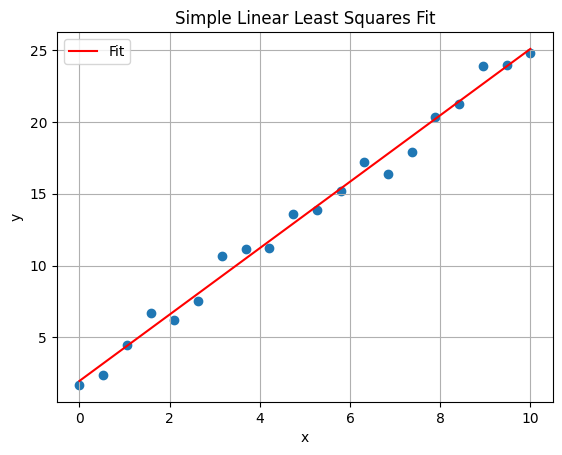

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define example data if not already defined
np.random.seed(42)
x = np.linspace(0, 10, 20)
true_coef = np.array([2.5, 1.2])
A = np.vstack([x, np.ones(len(x))]).T
y_linear = A @ true_coef + np.random.normal(size=len(x))

#%% Least-squares solution
#With built-in least-squares function
print("---------------------------------------------")
print("First simple example for Least Squares")
coef_lstsq, *_ = np.linalg.lstsq(A, y_linear, rcond=None)

#With normal equations
coef_normal = np.linalg.inv(A.T @ A) @ (A.T @ y_linear)

# Explicit SVD pseudo-inverse: x = V Σ⁺ Uᵀ b
U, S, VT = np.linalg.svd(A, full_matrices=False)
Sigma_inv = np.diag(1.0 / S)
coef_svd = VT.T @ Sigma_inv @ U.T @ y_linear

print("True coefficients:        ", true_coef)
print("Least squares (lstsq):    ", coef_lstsq)
print("Normal equations:         ", coef_normal)
print("SVD pseudo-inv solution:  ", coef_svd)

# Plot data and LS fit
plt.figure()
plt.scatter(x, y_linear)
plt.plot(x, A @ coef_lstsq, color='red', label='Fit')
plt.title("Simple Linear Least Squares Fit")
plt.xlabel("x"); plt.ylabel("y"); plt.grid(True)
plt.legend()
plt.show()

<font color='blue'> **Are solution options 1, 2, 3 always equivalently good? Why/why not?**</font>

Hint: Remember the condition number of a matrix (https://www.phys.uconn.edu/~rozman/Courses/m3511_18s/downloads/condnumber.pdf):

$\kappa(\mathbf{A}) = \frac{\max{\mathbf{\Sigma}}}{\min{\mathbf{\Sigma}}} \qquad \left( 5 \right)$

If we consider a system where $\mathbf{A}\;\mathbf{x}=\mathbf{b}$, then a perturbation of $\mathbf{b}$, results to a perturbation in $\mathbf{x}$, such that

$\frac{\|\mathbf{\delta x}\|_2}{\|\mathbf{x}\|_2} \leq \kappa \left({\mathbf{A}}\right) \frac{\|\mathbf{\delta b}\|_2}{\|\mathbf{b}\|_2}$.

This inequality gives a worst-case sensitivity factor of the linear system solution  $\mathbf{x}$, given a perturbation of $\mathbf{b}$. You can find a more detailed analysis for LS problems in slide 34 of https://www.mat.tuhh.de/lehre/material/Regularisierung.pdf.

<font color='blue'> **What is the condition number of $\mathbf{A} \mathbf{A}^T$ with respect to $\kappa(\mathbf{A})$?**</font>

---------------------------------------------
High-degree polynomial fit (condition number for normal equations)
cond(X)     = 321347494542138.75
cond(X^T X) = 3.264238640879868e+29
Least squares (lstsq):     [ 5.81619920e-06 -3.09475668e-04  7.06834334e-03 -9.04998169e-02
  7.11326649e-01 -3.52872678e+00  1.08916563e+01 -1.94694680e+01
  1.53064042e+01  6.77779994e+00 -2.35142035e+01  1.74919195e+01
  1.63328683e+00]
Normal equations:          [-3.72601218e-06  2.59490845e-04 -7.80020621e-03  1.33239410e-01
 -1.43061854e+00  1.00744422e+01 -4.70849482e+01  1.44545172e+02
 -2.82270822e+02  3.30427382e+02 -2.08653191e+02  5.82002323e+01
  1.65289078e+00]
SVD pseudo-inv solution:   [ 1.04608344e-05 -5.92344741e-04  1.46383274e-02 -2.07509878e-01
  1.86614322e+00 -1.11221187e+01  4.45717557e+01 -1.19240762e+02
  2.06257109e+02 -2.14202783e+02  1.12321048e+02 -1.49812660e+01
  1.70458471e+00]


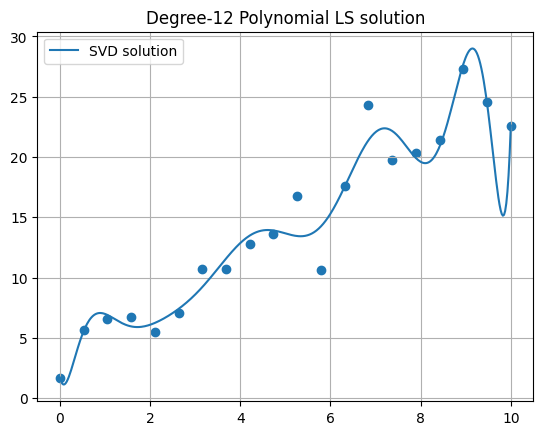

In [3]:

#%% Polynomial fit
# ---------------------------------------------------------------
print("---------------------------------------------")
print("High-degree polynomial fit (condition number for normal equations)")

# High-degree polynomial fit (ill-conditioned)
degree = 12

np.random.seed(3)
noise2 = 1+np.random.normal(scale=2, size=len(x))
y_sin = np.multiply(2*np.sin(2*x), noise2) + y_linear

X_poly = np.vander(x, deg := degree+1, increasing=False)

#Plot the condition number of the matrices at each case.
print("cond(X)     =", np.linalg.cond(X_poly))
print("cond(X^T X) =", np.linalg.cond(X_poly.T @ X_poly))

#Compare the normal soln, the SVD and the built-in equation.

# Plain LS polynomial fit (sensitive)
coef_poly, *_ = np.linalg.lstsq(X_poly, y_sin, rcond=None)

#With normal equations
coef_normal = np.linalg.inv(X_poly.T @ X_poly) @ (X_poly.T @ y_sin)

# Explicit SVD pseudo-inverse: x = V Σ⁺ Uᵀ b
U, S, VT = np.linalg.svd(X_poly, full_matrices=False)
Sigma_inv = np.diag(1 / S)
coef_svd = VT.T @ Sigma_inv @ U.T @ y_sin

print("Least squares (lstsq):    ", coef_poly)
print("Normal equations:         ", coef_normal)
print("SVD pseudo-inv solution:  ", coef_svd)

# Plot polynomial fits
x_plot = np.linspace(min(x), max(x), 400)
X_plot_poly = np.vander(x_plot, deg, increasing=False)

plt.figure()
plt.scatter(x, y_sin)
plt.plot(x_plot, X_plot_poly @ coef_svd, label="SVD solution")
plt.legend(); plt.grid(True)
plt.title(f"Degree-{degree} Polynomial LS solution")
plt.show()

<font color='blue'> **How much is the solution of $\left( 2 \right)$ affected by a small perturbation in $\mathbf{b}$, depending on the solution method?**</font>

In [4]:
#%% Perturbation to the previous solution
print("---------------------------------------------")
print("Perturbation to LS solutions")

y_perturbed = y_sin.copy()

# Perturbation aligned with weakest singular direction
epsilon = 1e-3
y_perturbed = y_sin + epsilon * U[:, -1]

coef_normal_perturbed = np.linalg.inv(X_poly.T @ X_poly) @ (X_poly.T @ y_perturbed)

# Plain LS polynomial fit (sensitive)
coef_poly_perturbed, *_ = np.linalg.lstsq(X_poly, y_perturbed, rcond=None)

print("Normal eq sensitivity:",
      np.linalg.norm(coef_normal - coef_normal_perturbed))
print("Lstsq sensitivity:",
      np.linalg.norm(coef_poly - coef_poly_perturbed))

---------------------------------------------
Perturbation to LS solutions
Normal eq sensitivity: 0.07423082981684755
Lstsq sensitivity: 4.742651152345775e-12


We see that solving the normal equations is generally not a good idea. The SVD solution is

$\mathbf{x}=\mathbf{V} \mathbf{\Sigma}^{-1}  \mathbf{U}^T \mathbf{b} \qquad \left(6 \right)$

<font color='blue'> **Do you see any potential issue here?**</font>

A fundamental issue is that perturbations along the singular vectors that correspond to small singular values will be amplified.
If we change $\left( 2 \right)$ to

$\mathbf{x}_{LS}=\textrm{arg}_{\mathbf{x} \in \mathbb{R}^{n}}  \min{{\| \mathbf{A} \; \mathbf{x} - \mathbf{b}\|}_2^2  +\lambda {\| \mathbf{x}\|}_2^2}\qquad \left( 7 \right)$

we avoid this issue.

<font color='blue'> **Can you show how the singular vectors are amplified in this case?**</font> (You can check here: https://www2.math.uconn.edu/~leykekhman/courses/MATH3795/Lectures/Lecture_10_Linear_least_squares_reg.pdf).

<font color='blue'> **Can you think of another way of suppressing the potential amplification of perturbations along those vectors?**</font>

In the following, we implement regularization for the LS problem that we just solved, using Tikhonov regularization and truncated SVD.

In [5]:
# Ridge (Tikhonov): (XᵀX + λI)⁻¹ Xᵀy
# Ridge regularization dampens small singular values:
# amplification factor = sigma / (sigma^2 + lambda)
def ridge(X, y, lam):
    n = X.shape[1]
    return np.linalg.solve(X.T @ X + lam*np.eye(n), X.T @ y)


# Truncated SVD
def tSVD(U, S, VT, y, r):

    Ut = U[:,:r]
    St = S[:r]
    VTt = VT[:r]
    Sigma_inv = np.diag(1 / St)

    return VTt.T @ Sigma_inv @ Ut.T @ y



lams = [0, 1e-3, 1e-2, 1]
ridge_coefs = [ridge(X_poly, y_sin, lam) for lam in lams]

truncation_levels = [4, 6, 8, 10]
tSVD_coefs = [tSVD(U, S, VT, y_sin, r) for r in truncation_levels]

We evaluate the quality of the LS problem solution, for different regularization values (both for Tikhonov and truncated SVD):

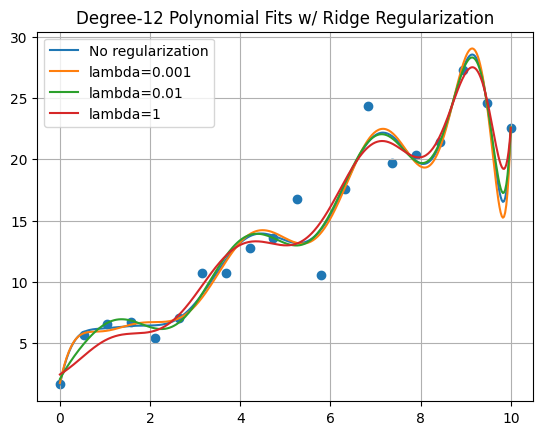

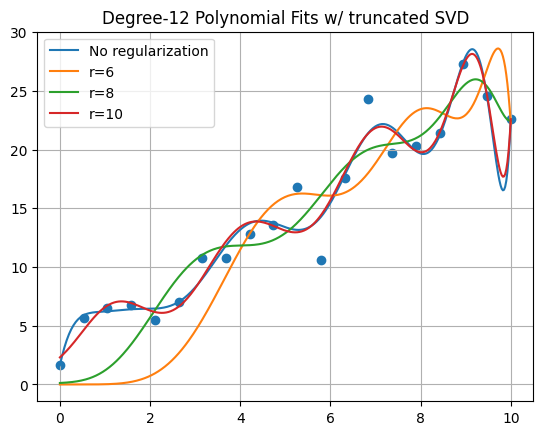

In [6]:

# Plot polynomial fits
x_plot = np.linspace(min(x), max(x), 400)
X_plot_poly = np.vander(x_plot, deg, increasing=False)

plt.figure()
plt.scatter(x, y_sin)
plt.plot(x_plot, X_plot_poly @ coef_poly, label="No regularization")
for lam, c in zip(lams[1:], ridge_coefs[1:]):
    plt.plot(x_plot, X_plot_poly @ c, label=f"lambda={lam}")
plt.legend(); plt.grid(True)
plt.title(f"Degree-{degree} Polynomial Fits w/ Ridge Regularization")
plt.show()

plt.figure()
plt.scatter(x, y_sin)
plt.plot(x_plot, X_plot_poly @ coef_poly, label="No regularization")
for r, c in zip(truncation_levels[1:], tSVD_coefs[1:]):
    plt.plot(x_plot, X_plot_poly @ c, label=f"r={r}")
plt.legend(); plt.grid(True)
plt.title(f"Degree-{degree} Polynomial Fits w/ truncated SVD")
plt.show()

As you might have proven, the solution to the regularized LS problem in $\left( 7 \right)$ is

$\mathbf{x}=\sum_{i=1}^{n}{\frac{\sigma_i \left( \mathbf{U}_i^T \mathbf{b} \right)}{\sigma_i^2 + \lambda}\mathbf{V}_i}$

We will check the amplification factor for each singular vector, using Tikhonov regularization or truncated SVD.

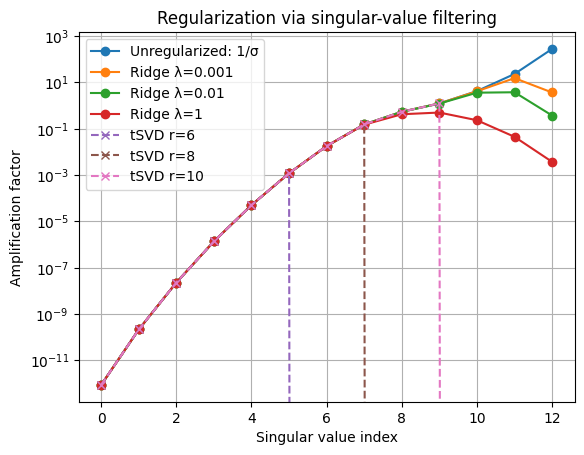

In [7]:

plt.figure()
# Unregularized LS: 1/sigma
plt.semilogy(1 / S, marker='o', label='Unregularized: 1/σ')

# Ridge regularization: σ / (σ^2 + lambda)
for lam in lams[1:]:
    plt.semilogy(S / (S**2 + lam), marker='o', label=f'Ridge λ={lam}')

# Truncated SVD: hard cutoff
for r in truncation_levels[1:]:
    filt_tsvd = np.zeros_like(S)
    filt_tsvd[:r] = 1 / S[:r]
    plt.semilogy(filt_tsvd, linestyle='--', marker='x', label=f'tSVD r={r}')

plt.xlabel("Singular value index")
plt.ylabel("Amplification factor")
plt.title("Regularization via singular-value filtering")
plt.legend()
plt.grid(True)
plt.show()

Let's compute the sensitivity of the LS solution to the same perturbation on the equation right-hand side.

<font color='blue'> **What do you notice comparing to the unregularized solution?**</font>

In [8]:

sens_ridge = []
sens_tsvd = []

for lam in lams:
    c1 = ridge(X_poly, y_sin, lam)
    c2 = ridge(X_poly, y_perturbed, lam)
    sens_ridge.append(np.linalg.norm(c1 - c2))

for r in truncation_levels:
    c1 = tSVD(U, S, VT, y_sin, r)
    c2 = tSVD(U, S, VT, y_perturbed, r)
    sens_tsvd.append(np.linalg.norm(c1 - c2))


print("Sensitivity on perturbed solution for truncated SVD")
print(np.array(sens_tsvd))
print("-----------------------------")
print("Sensitivity on perturbed solution for L2 regularization")
print(np.array(sens_ridge))

Sensitivity on perturbed solution for truncated SVD
[8.74730109e-22 3.09141730e-18 2.53461153e-16 1.11595450e-15]
-----------------------------
Sensitivity on perturbed solution for L2 regularization
[7.42597160e-02 3.79896022e-03 3.65431922e-04 3.64425219e-06]


As you will see later, in many cases we prefer small $L_2$ norms for the LS solution, $\mathbf{x}$. Let's evaluate how the Tikhonov regularization weight $\lambda$ affects this.

In [9]:

print("\n--- Ridge Stabilization ---")
for lam, coef in zip(lams, ridge_coefs):
    print(f"lambda={lam:>6}: coefficient norm = {np.linalg.norm(coef):.3f}")


--- Ridge Stabilization ---
lambda=     0: coefficient norm = 508.913
lambda= 0.001: coefficient norm = 53.759
lambda=  0.01: coefficient norm = 11.192
lambda=     1: coefficient norm = 4.133
